__Let’s say you have a categorical variable with thousands of distinct values, how would you encode it__


When you have a categorical variable with thousands of distinct values (high cardinality), traditional encoding methods like one-hot encoding become impractical due to the following reasons:

* One-hot encoding creates a new binary column for each unique category, which leads to a very high-dimensional sparse matrix. This increases computational complexity, memory usage, and can cause the "curse of dimensionality" affecting model performance


To handle high-cardinality categorical variables effectively, several alternative encoding techniques are recommended:

1. __Binary Encoding__

    Assigns a unique integer to each category, converts it to binary code, and splits the binary digits into separate columns.
    Reduces dimensionality compared to one-hot encoding while preserving information.
    Memory-efficient and suitable for many ML algorithms.
    Useful when you want a balance between dimensionality reduction and interpretability


3. __Target Encoding (Mean Encoding)__

    Replaces each category with the mean of the target variable for that category (in supervised learning).
    Captures the relationship between category and target, reducing dimensionality to one column.
    Requires careful handling to avoid data leakage (e.g., using cross-validation or smoothing techniques)

4. __Count or Frequency Encoding__

    Encodes each category by the frequency or count of its occurrences in the dataset.
    Simple and effective for reducing dimensionality while retaining some information about category prevalence
    
5. __Feature Hashing (Hash Encoding)__

    Hashes categories into a fixed number of columns, controlling dimensionality explicitly.
    Efficient for very large cardinality but can introduce collisions (different categories mapped to the same hash)

6. __Embedding Layers (Deep Learning)__

    Learns dense vector representations of categories during model training.
    Useful in neural networks for very high-cardinality features, capturing complex relationships



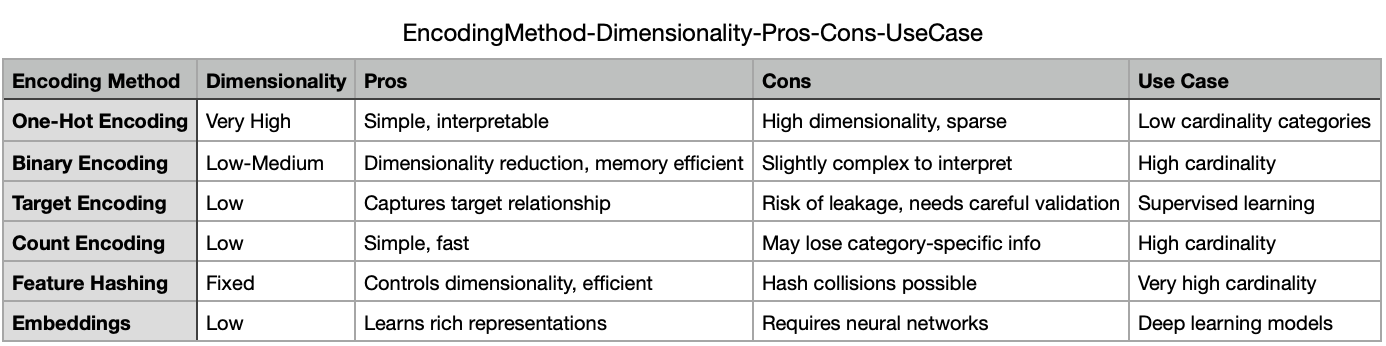

--------

## Encoding Categorical Features

There are 2 kinds of categorical data:

Ordinal Data: The categories have an inherent order in Job Change dataset are:[ 'education_level', 'experience','company_size','last_new_job']

Nominal Data: The categories do not have an inherent order in Job chanege dataset are:['city','gender','enrolled_university','major_discipline', 'company_type','relevent_experience',] (binary data could be nominal or ordinal)

Generally: In Ordinal data, while encoding, one should retain the information regarding the order in which the category is provided. While encoding Nominal data, we have to consider the presence or absence of a feature. In such a case, no notion of order is present.

__So how should we select encoding methods is depends algorithm(s) we apply :__



- Some algorithms can work with categorical data directly e.g LightGBM , CatBoost , or For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).
- Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.
- Some implementations of machine learning algorithms require all data to be numerical. For example, scikit-learn has this requirement.
- If we categorize algorithms to linear and tree based models we sholuld consider that generally linear models are sensitive to order of ordinal data so we should select appropriate encoding methods.


---

Working with the data on `Encoding`

In [1]:
import pandas as pd
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [5]:
import warnings
warnings.simplefilter('ignore')

In [30]:
os.listdir('./DataSet')

['aug_test.csv',
 '.DS_Store',
 'jobchange_test_target_values.npy',
 'aug_train.csv']

In [7]:
test = pd.read_csv('DataSet/aug_test.csv')
train = pd.read_csv('DataSet/aug_train.csv')
answer = np.load('DataSet/jobchange_test_target_values.npy')

In [7]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [9]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
answer.shape, train.shape, test.shape

((2129,), (19158, 14), (2129, 13))

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [9]:
train.columns = ['enrollee_id', 'city_nom', 'city_development_index', 'gender_nom','relevent_experience_nom', 'enrolled_university_nom', 
                 'education_level_ord', 'major_discipline_nom', 'experience_ord', 'company_size_ord', 'company_type_nom', 'last_new_job_ord',
                 'training_hours', 'target']

test.columns = ['enrollee_id', 'city_nom', 'city_development_index', 'gender_nom','relevent_experience_nom', 'enrolled_university_nom', 
                'education_level_ord','major_discipline_nom', 'experience_ord', 'company_size_ord', 'company_type_nom','last_new_job_ord', 
                'training_hours']

ordinals= [c for c in train.columns if 'ord' in c] 
nominals = [c for c in train.columns if 'nom' in c]
ordinals

['education_level_ord',
 'experience_ord',
 'company_size_ord',
 'last_new_job_ord']

In [32]:
from IPython.display import display
pd.set_option('display.max_colwidth', 300)

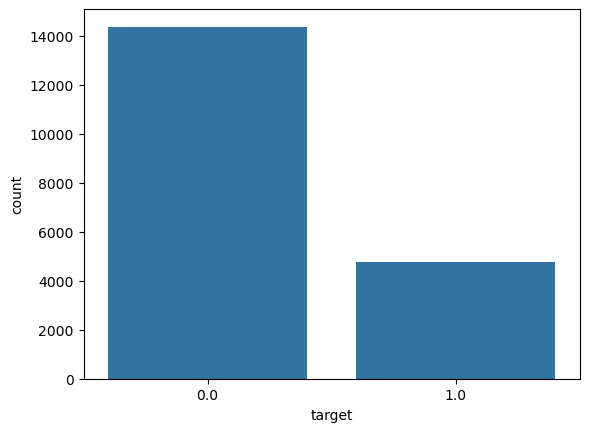

In [50]:
sns.countplot(train, x='target', legend='auto')
plt.show()

Analysis of categorical variable

In [84]:
categorical_columns = nominals + ordinals

def analysis_cat(dataframe, columns):

    cl  = []; u = []; nans = []; s = [] # creating empty list
    
    d = pd.DataFrame()

    for column_ in columns:
        cl.append(column_)
        u.append(dataframe[column_].unique())
        s.append(dataframe[column_].unique().size)
        nans.append(dataframe[column_].isna().sum())

    d['feature'] = cl
    d['uniques'] = u
    d['cardinality']  = s
    d['nan'] = nans

    return d

plt.style.use('fivethirtyeight')
analysis_cat(train, categorical_columns)    

,feature,uniques,cardinality,nan
0,city_nom,"[city_103, city_40, city_21, city_115, city_162, city_176, city_160, city_46, city_61, city_114, city_13, city_159, city_102, city_67, city_100, city_16, city_71, city_104, city_64, city_101, city_83, city_105, city_73, city_75, city_41, city_11, city_93, city_90, city_36, city_20, city_57, city...",123,0
1,gender_nom,"[Male, nan, Female, Other]",4,4508
2,relevent_experience_nom,"[Has relevent experience, No relevent experience]",2,0
3,enrolled_university_nom,"[no_enrollment, Full time course, nan, Part time course]",4,386
4,major_discipline_nom,"[STEM, Business Degree, nan, Arts, Humanities, No Major, Other]",7,2813
5,company_type_nom,"[nan, Pvt Ltd, Funded Startup, Early Stage Startup, Other, Public Sector, NGO]",7,6140
6,education_level_ord,"[Graduate, Masters, High School, nan, Phd, Primary School]",6,460
7,experience_ord,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 10, 14, 18, 19, 12, 3, 6, 9, 8, 20, nan]",23,65
8,company_size_ord,"[nan, 50-99, <10, 10000+, 5000-9999, 1000-4999, 10/49, 100-500, 500-999]",9,5938
9,last_new_job_ord,"[1, >4, never, 4, 3, 2, nan]",7,423


In [102]:
pd.DataFrame(train.isna().sum(axis=0)/len(train)*100, columns=['missing_values']).sort_values('missing_values', ascending=False)

,missing_values
company_type_nom,32.049274
company_size_ord,30.994885
gender_nom,23.530640
major_discipline_nom,14.683161
education_level_ord,2.401086
last_new_job_ord,2.207955
enrolled_university_nom,2.014824
experience_ord,0.339284
enrollee_id,0.000000
city_nom,0.000000


Function for analysis of missing values 

In [111]:
def missing_values(df):

    '''
    args : dataframe
    desc : get nulls for each column in counts & percentage 
    return : dataframe
    '''
    null_count = df.isnull().sum() # calculate null counts 
    null_count = null_count[null_count != 0 ] # removing non-null columns
    null_percentage = null_count / len(df) * 100
    null_table = pd.concat([pd.DataFrame(null_count), pd.DataFrame(null_percentage)], axis=1)
    null_table.columns = ['counts', 'percentage']
    null_table.sort_values(by='counts', ascending=False, inplace=True)
    return null_table


missing_values(train)    

,counts,percentage
company_type_nom,6140,32.049274
company_size_ord,5938,30.994885
gender_nom,4508,23.530640
major_discipline_nom,2813,14.683161
education_level_ord,460,2.401086
last_new_job_ord,423,2.207955
enrolled_university_nom,386,2.014824
experience_ord,65,0.339284


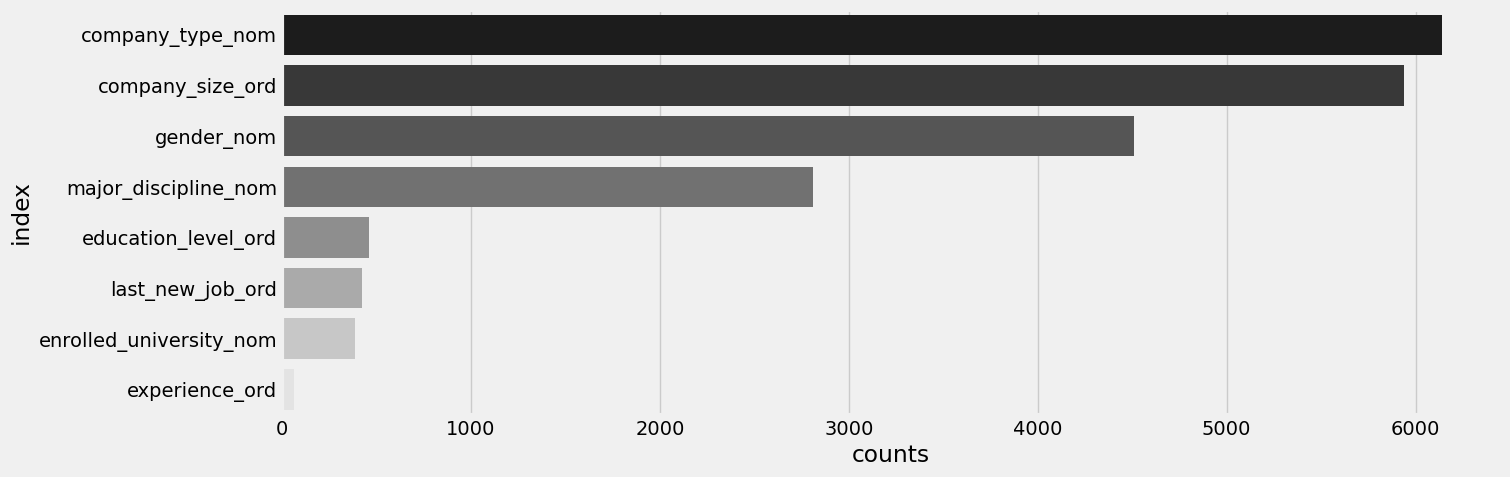

In [129]:
plt.figure(figsize=(14,5))
sns.barplot(missing_values(train).reset_index()[['index','counts']], x='counts', y='index', palette='gray')
plt.show()

### Label Encoding

Label encoding includes replacing the categories with digits from 1 to n (or 0 to n-1, depending on the implementation),where n is the number of the variable’s distinct categories (the cardinality), and these numbers are assigned arbitrarily.



Advantages of integer (label) encoding

- Straightforward to implement.
- Does not expand the feature space.
-  Can work well enough with tree-based algorithms.
-    Allows agile benchmarking of machine learning models.

Limitations of integer (label) encoding

-    Does not add extra information while encoding.
-    Not suitable for linear models.
-    Does not handle new categories in the test set automatically.
-    Creates an order relationship between the categories.



https://www.kaggle.com/code/arashnic/an-overview-of-categorical-encoding-methods/notebook

https://www.kaggle.com/code/arashnic/an-overview-of-categorical-encoding-methods/notebook